In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go




In [219]:
df_merged = pd.read_csv('D:\\Projo\\Projet-Data-IA\\Merged_all_tables\\merged_all_tables.csv', sep=',')

In [220]:

# def minutes_to_hours_minutes(minutes):
#     hours = int(minutes / 60)
#     remaining_minutes = minutes % 60
#     return f"{hours} heures {remaining_minutes} minutes"

# df_merged['runtimeMinutes'] = df_merged['runtimeMinutes'].apply(minutes_to_hours_minutes)
# # rename de la colonne runtimeMinutes à duration
# df_merged.rename(columns={'runtimeMinutes': 'duration'}, inplace=True)

In [221]:
# # Jointures des tables title et merged_all_tables pour récupérer les valeurs de la colonne genres

# df_del_cols = pd.read_csv('D:\\Projo\\Projet-Data-IA\\title_del_cols.csv', sep=',')
# df_merged = pd.merge(df_merged, df_del_cols, left_on='titleId', right_on='tconst', how='left')

In [222]:
def clean_actors_list(actors_list):
    # Convertir la liste en un ensemble pour supprimer les doublons, puis trier
    unique_actors = sorted(set(actors_list))
    # Convertir l'ensemble trié en une chaîne de caractères séparée par des virgules
    cleaned_list = ', '.join(unique_actors)
    return cleaned_list

# Appliquer la fonction à chaque élément de la colonne "Actors_Actresses"
df_merged['Actors_Actresses'] = df_merged['Actors_Actresses'].apply(eval).apply(clean_actors_list)
df_merged['production_companies_name'] = df_merged['production_companies_name'].apply(eval).apply(clean_actors_list)

# Suppression des colonnes inutiles pour l'analyse
df_merged.drop(columns=['titleId','overview', 'poster_path', 'backdrop_path'], inplace=True)

df_merged.head(5)

,title,averageRating,numVotes,startYear,runtimeMinutes,genres,popularity,production_companies_name,Director_name,Actors_Actresses
0,De l'autre côté du vent,6.7,8019,2018.0,122.0,Drama,8.002,"Les Films de l'Astrophore, SACI",Orson Welles,"Cameron Mitchell, Edmond O'Brien, John Huston,..."
1,Le Chat noir,5.8,4233,1981.0,92.0,Horror,6.053,"Italian International Film, Selenia Cinematogr...",Lucio Fulci,"Al Cliver, Bruno Corazzari, Dagmar Lassander, ..."
2,Celles qu'on n'a pas eues...,5.7,176,1981.0,105.0,Comedy,1.508,"France 2, Les Films Français, Nordine FIlms, T...",Pascal Thomas,"Anouk Ferjac, Bernard Menez, Daniel Ceccaldi, ..."
3,Les âges du coeur,5.7,691,1981.0,106.0,Drama,2.783,"Film Consortium of Canada, Milton Zyrman Produ...",Jules Dassin,"Donann Cavin, Elan Ross Gibson, Larry Ewashen,..."
4,Colegas,6.5,694,1982.0,98.0,Drama,1.924,Ópalo Films,Eloy de la Iglesia,"Antonio Flores, Francisco Casares, Isabel Pera..."


In [223]:
df_merged.dtypes


title                         object
averageRating                float64
numVotes                       int64
startYear                    float64
runtimeMinutes               float64
genres                        object
popularity                   float64
production_companies_name     object
Director_name                 object
Actors_Actresses              object
dtype: object

In [224]:
df_merged.describe()

,averageRating,numVotes,startYear,runtimeMinutes,popularity
count,4734.000000,4.734000e+03,4734.000000,4734.000000,4734.000000
mean,6.370194,1.123763e+04,2007.474229,103.239544,5.827385
std,0.723375,7.299382e+04,11.985751,15.335438,22.093123
min,5.000000,1.010000e+02,1981.000000,85.000000,0.600000
25%,5.800000,3.142500e+02,1999.000000,93.000000,1.400000
50%,6.400000,8.225000e+02,2010.000000,100.000000,2.720500
75%,6.900000,2.875250e+03,2018.000000,110.000000,5.950250
max,9.300000,2.878611e+06,2024.000000,238.000000,1107.559000


In [225]:
# Les 20 films les mieux notés de 1980 à 2024

df_sorted_avg =  df_merged.sort_values(by='averageRating', ascending=False)
df_sorted_avg.head(20)

,title,averageRating,numVotes,startYear,runtimeMinutes,genres,popularity,production_companies_name,Director_name,Actors_Actresses
771,Les évadés,9.3,2878611,1994.0,142.0,Drama,84.139,Castle Rock Entertainment,Frank Darabont,"Bob Gunton, Clancy Brown, Gil Bellows, James W..."
3316,National Theatre Live: Prima Facie,9.1,1734,2022.0,120.0,Drama,4.184,"Echo Lake Entertainment, Empire Street Product...",Justin Martin,Jodie Comer
2374,Chal Mera Putt 2,8.9,3432,2020.0,124.0,Drama,1.960,"Gillz Network, Omjee Star Studios, Rhythm Boyz...",Janjot Singh,"Agha Majid, Akram Udaas, Amrinder Gill, Garry ..."
4307,Cinema Twain,8.8,111,2019.0,90.0,Comedy,1.541,Val Art LTD,Val Kilmer,Val Kilmer
1011,Fight Club,8.8,2314328,1999.0,139.0,Drama,58.660,"20th Century Fox, Atman Entertainment, Fox 200...",David Fincher,"Brad Pitt, Christina Cabot, David Andrews, Edw..."
4493,Pariyerum Perumal,8.7,18342,2018.0,154.0,Drama,3.730,"Lyca Productions, Neelam Productions",Mari Selvaraj,"'Poo' Ram, Anandhi, Anthony Dasan, G. Marimuth..."
2212,The Kashmir Files,8.6,573495,2022.0,170.0,Drama,7.820,"Abhishek Agarwal Arts, Zee Studios",Vivek Agnihotri,"Anupam Kher, Bhasha Sumbli, Chinmay Mandlekar,..."
2151,Hellaro,8.6,1586,2019.0,121.0,Drama,1.363,Harfanmaula Films,Abhishek Shah,"Aarjav Trivedi, Brinda Trivedi, Firoz Arab, Ja..."
611,Baraka,8.5,40917,1992.0,96.0,Documentary,10.121,Magidson Films,Ron Fricke,Patrick Disanto
4505,Capharnaüm,8.4,104537,2018.0,126.0,Drama,28.900,"Boo Pictures, Cedrus Invest Bank, Clandestino ...",Nadine Labaki,"Alaa Chouchnieh, Boluwatife Treasure Bankole, ..."


In [226]:
# Moyenne durée des 20 films les mieux notés
df_mean_avg = df_sorted_avg['runtimeMinutes'].head(20).mean()
df_mean_avg.round()

122.0

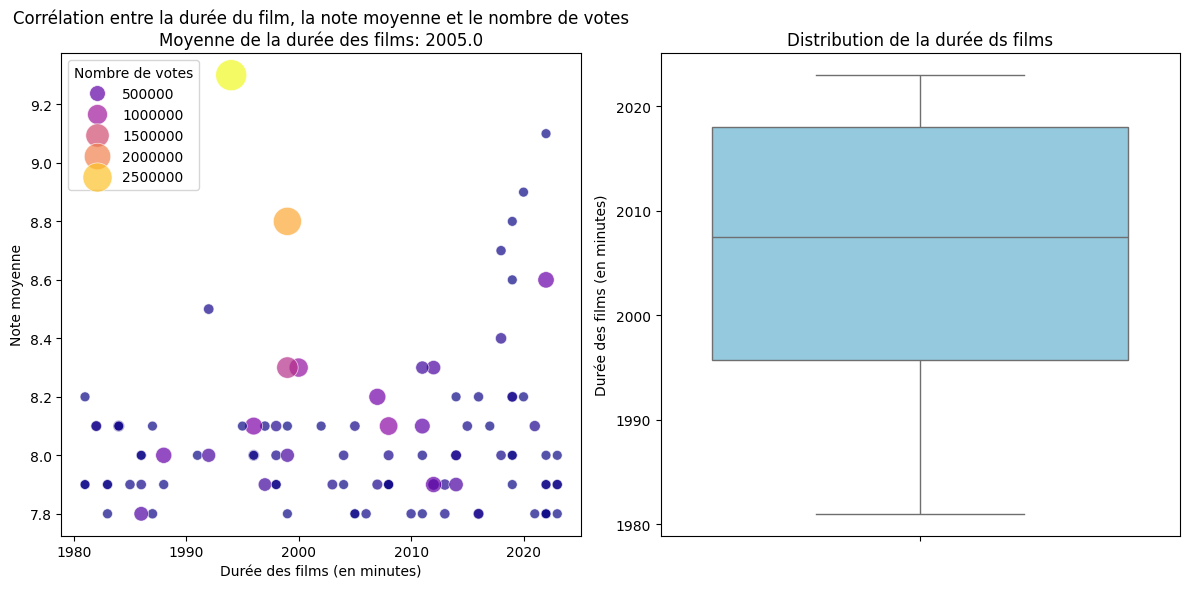

In [227]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Trier le DataFrame selon la colonne 'averageRating' et sélectionner les 20 premières lignes
df_top_20 = df_sorted_avg.sort_values(by='averageRating', ascending=False).head(100)

# Nuage de points avec 'runtimeMinutes' sur l'axe x, 'averageRating' sur l'axe y et 'numVotes' comme taille des points
sns.scatterplot(data=df_top_20, x='startYear', y='averageRating', hue='numVotes', palette='plasma', size='numVotes', sizes=(50, 500), alpha=0.7, ax=axes[0])

# Barre de couleur pour expliquer la signification des couleurs
axes[0].legend(title='Nombre de votes', loc='upper left')

axes[0].set_xlabel('Durée des films (en minutes)')
axes[0].set_ylabel('Note moyenne')
axes[0].set_title(f'Corrélation entre la durée du film, la note moyenne et le nombre de votes\nMoyenne de la durée des films: {df_top_20["startYear"].mean().round()}')

# Graphique boxplot pour 'runtimeMinutes'
sns.boxplot(data=df_top_20, y='startYear', ax=axes[1], color='skyblue')

# Ajouter des labels et un titre
axes[1].set_ylabel('Durée des films (en minutes)')
axes[1].set_title('Distribution de la durée ds films')


plt.tight_layout()
plt.show()



* On peut voir que la majorité des films de 500 000 à 1 000 000 de nombres de votes se situe entre 110 Minutes et 140 Minutes

In [228]:
# Top 20 des films les plus votés
df_sorted_numVotes =  df_merged.sort_values(by='numVotes', ascending=False)
df_sorted_numVotes.head(20)

,title,averageRating,numVotes,startYear,runtimeMinutes,genres,popularity,production_companies_name,Director_name,Actors_Actresses
771,Les évadés,9.3,2878611,1994.0,142.0,Drama,84.139,Castle Rock Entertainment,Frank Darabont,"Bob Gunton, Clancy Brown, Gil Bellows, James W..."
1011,Fight Club,8.8,2314328,1999.0,139.0,Drama,58.660,"20th Century Fox, Atman Entertainment, Fox 200...",David Fincher,"Brad Pitt, Christina Cabot, David Andrews, Edw..."
1099,American Beauty,8.3,1208340,1999.0,122.0,Drama,26.384,"DreamWorks Pictures, Jinks/Cohen Company",Sam Mendes,"Allison Janney, Annette Bening, Chris Cooper, ..."
1116,Requiem for a Dream,8.3,896207,2000.0,102.0,Drama,14.092,"Artisan Entertainment, Protozoa Pictures, Thou...",Darren Aronofsky,"Christopher McDonald, Ellen Burstyn, Janet Sar..."
2290,Very Bad Trip,7.7,843116,2009.0,100.0,Comedy,73.308,"Green Hat Films, Legendary Pictures, Warner Br...",Todd Phillips,"Bradley Cooper, Ed Helms, Heather Graham, Jeff..."
2441,Gran Torino,8.1,813342,2008.0,116.0,Drama,21.048,"Double Nickel Entertainment, Gerber Pictures, ...",Clint Eastwood,"Ahney Her, Bee Vang, Brian Haley, Brian Howe, ..."
886,Trainspotting,8.1,723965,1996.0,93.0,Drama,20.969,"Channel Four Films, Figment Films, Film4 Produ...",Danny Boyle,"Eileen Nicholas, Ewan McGregor, Ewen Bremner, ..."
3002,Ted,6.9,655105,2012.0,106.0,Comedy,56.556,"Bluegrass Films, Fuzzy Door Productions, MRC, ...",Seth MacFarlane,"Aedin Mincks, Bill Smitrovich, Giovanni Ribisi..."
1819,There Will Be Blood,8.2,639266,2007.0,158.0,Drama,18.794,"Ghoulardi Film Company, Miramax, Paramount Van...",Paul Thomas Anderson,"Barry Del Sherman, Ciarán Hinds, Daniel Day-Le..."
1957,SuperGrave,7.6,630368,2007.0,113.0,Comedy,44.526,"Apatow Productions, Columbia Pictures",Greg Mottola,"Aviva Baumann, Bill Hader, Christopher Mintz-P..."


In [231]:
df_merged.value_counts('genres')

genres
Drama          3190
Comedy          938
Thriller        179
Horror          142
Documentary      83
Action           55
Romance          40
Family           28
Crime            17
Adventure        13
Sci-Fi           11
Animation         6
Musical           6
Fantasy           5
Biography         5
Western           5
History           4
War               4
Mystery           3
Name: count, dtype: int64

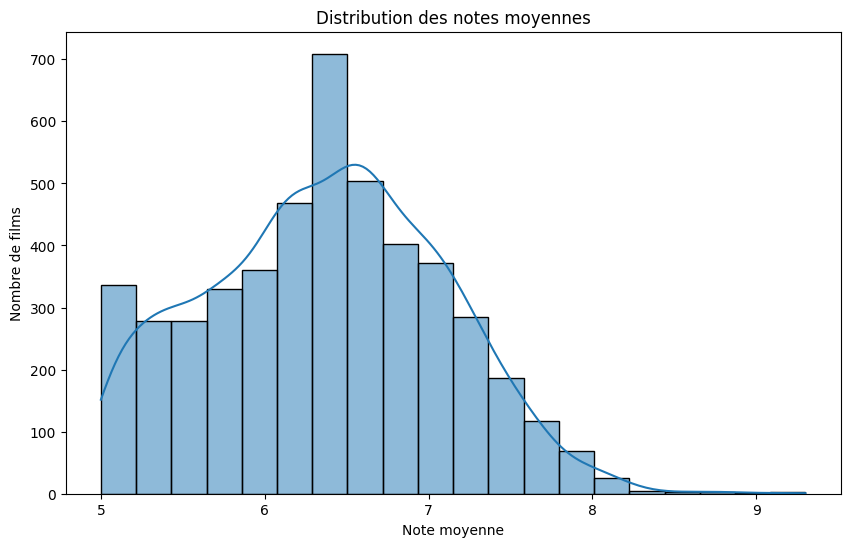

In [ ]:
# Moyenne des notes
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['averageRating'], bins=20, kde=True)
plt.title('Distribution des notes moyennes')
plt.xlabel('Note moyenne')
plt.ylabel('Nombre de films')
plt.show()


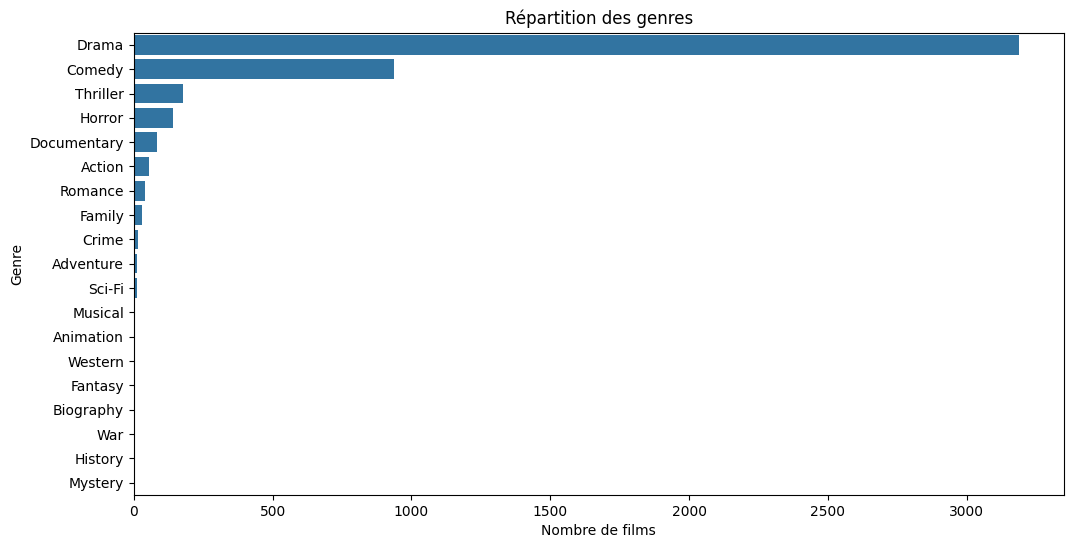

In [230]:
# Diagramme en barres pour les genres
plt.figure(figsize=(12, 6))
sns.countplot(y=df_merged['genres'], order = df_merged['genres'].value_counts().index)
plt.title('Répartition des genres')
plt.xlabel('Nombre de films')
plt.ylabel('Genre')
plt.show()


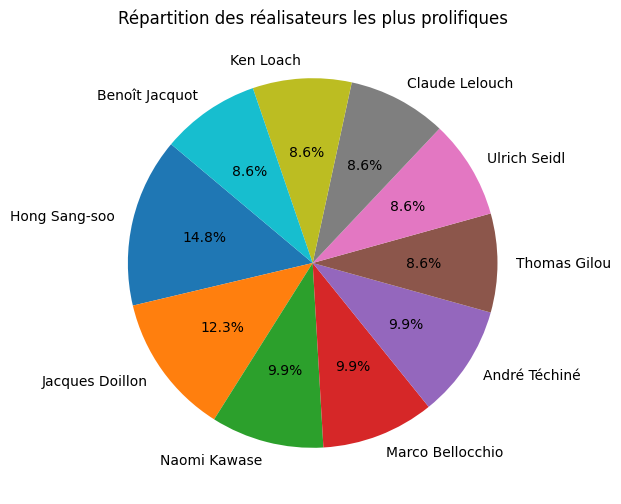

In [ ]:
# les réalisateurs les plus sollicités
# Ajouter les années
# faire un graphique des meilleures réalisateurs par films a succés
top_directors = df_merged['Director_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des réalisateurs les plus prolifiques')
plt.show()

In [ ]:
# Diagramme en barres pour les acteurs les plus sollicités
df_merged['Actors_Actresses'].value_counts().head()
# TRIER LES ACTEURS PAR NOMBRE DE FILMS LES PLUS SOLICITES ET LES ANNÉES DE LEURS FILMS

Actors_Actresses
Fernando E. Solanas                                                                                                                                                                    2
Cameron Mitchell, Edmond O'Brien, John Huston, Lilli Palmer, Mercedes McCambridge, Norman Foster, Oja Kodar, Peter Bogdanovich, Robert Random, Susan Strasberg                         1
Benjamin Biolay, Emmanuelle Devos, Hana Laslo, Jean-Noël Cnokaert, Nadir Legrand, Nicole Garcia, Rodolphe Dana, Sarah Adler, Valérie Donzelli, Éric Lartigau                           1
André Marcon, Bobbi Salvör Menuez, Carole Combes, Clément Métayer, Dolores Chaplin, Felix Armand, Hugo Conzelmann, Johnny Flynn, Lola Créton, Martin Loizillon                         1
Alice Morel-Michaud, Christine Harvey, Emmanuel Bilodeau, Evelyne de la Chenelière, François Léveillée, Gildor Roy, Jean-Marie Corbeil, Joseph Mesiano, Paul Doucet, Sylvie Léonard    1
Name: count, dtype: int64

In [ ]:
# Compagnies de production les plus populaires



In [ ]:
# Nombres de films pa année de sortie de  film

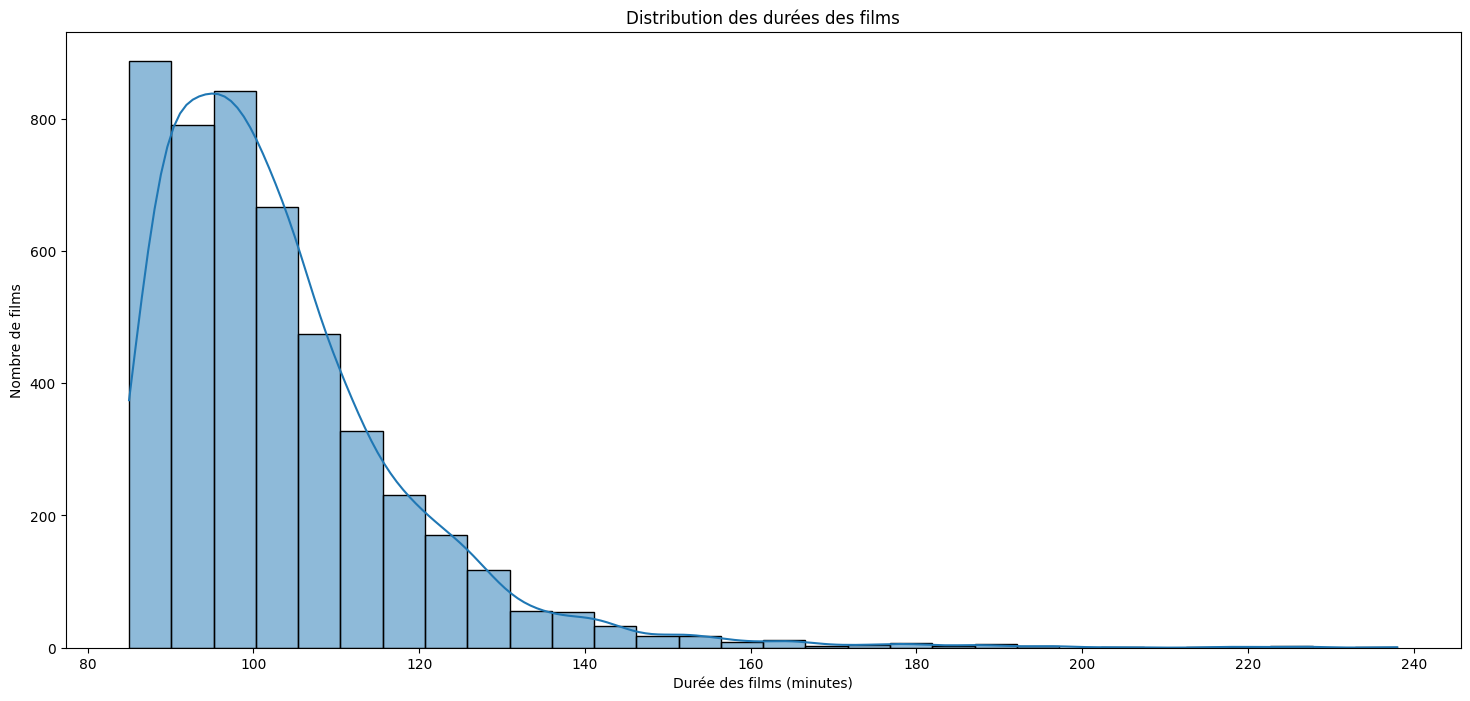

In [ ]:
# Distribution des durées des films par le nombre de films

plt.figure(figsize=(18, 8))
sns.histplot(df_merged['runtimeMinutes'], bins=30, kde=True)
plt.title('Distribution des durées des films')
plt.xlabel('Durée des films (minutes)')
plt.ylabel('Nombre de films')
plt.show()



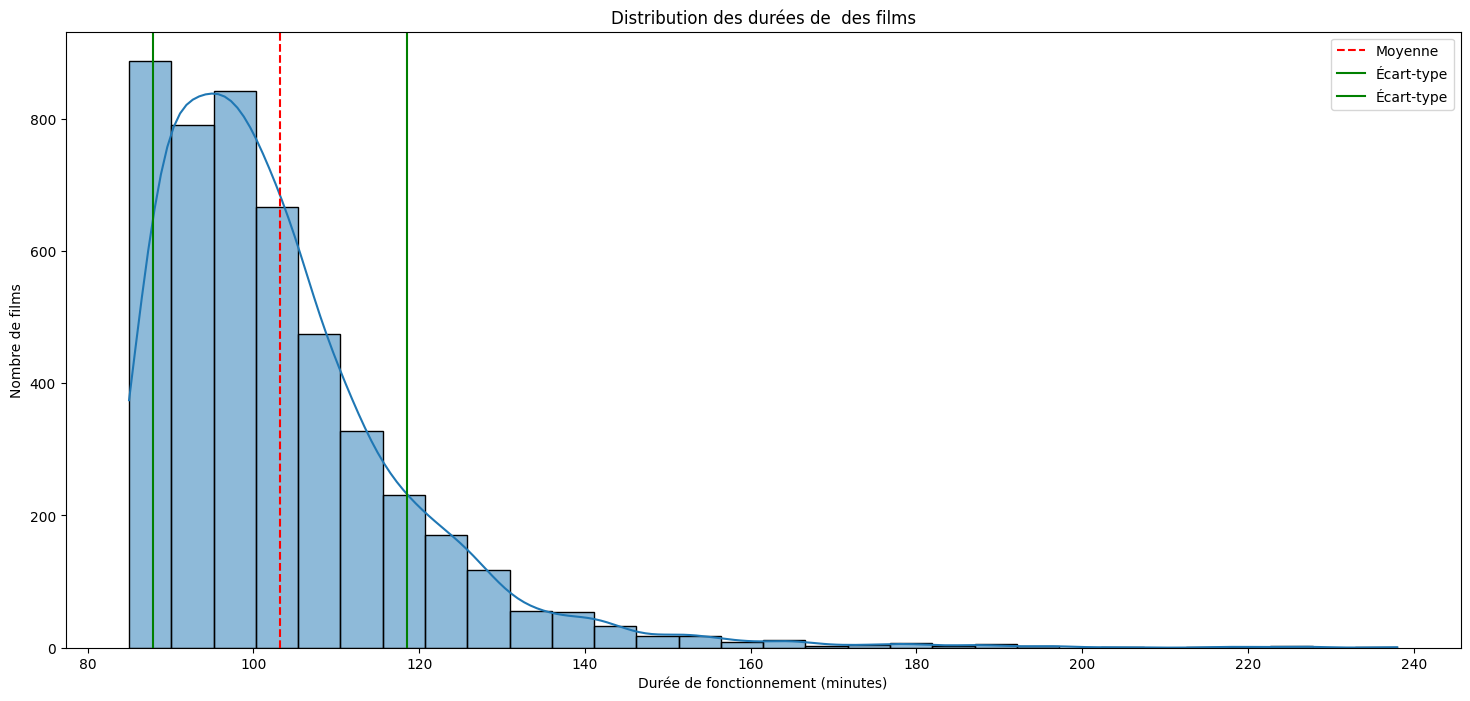

In [ ]:
# Calcul de la moyenne et de l'écart-type

plt.figure(figsize=(18, 8))
sns.histplot(df_merged['runtimeMinutes'], bins=30, kde=True)
plt.title('Distribution des durées de  des films')
plt.xlabel('Durée de fonctionnement (minutes)')
plt.ylabel('Nombre de films')

# Calcul de la moyenne et de l'écart-type
mean = df_merged['runtimeMinutes'].mean()
std_dev = df_merged['runtimeMinutes'].std()

# Tracer la moyenne et les lignes pour l'écart-type
plt.axvline(mean, color='r', linestyle='--', label='Moyenne')
plt.axvline(mean + std_dev, color='g', linestyle='-', label='Écart-type')
plt.axvline(mean - std_dev, color='g', linestyle='-', label='Écart-type')

plt.legend()
plt.show()


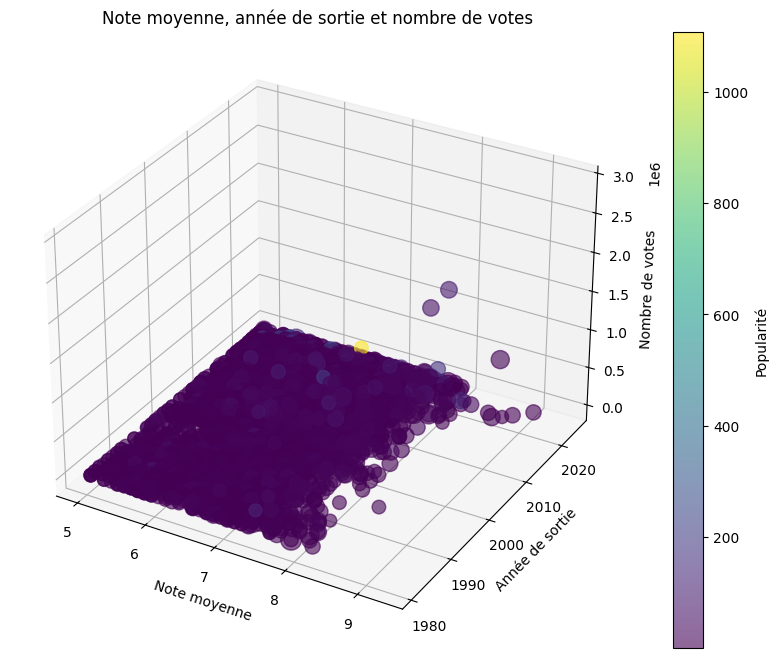

In [ ]:
# Note moyenne, année de sortie et nombre de votes
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection='3d')
x = df_merged['averageRating']
y = df_merged['startYear']
z = df_merged['numVotes']
colors = df_merged['popularity']
sizes = df_merged['runtimeMinutes']

scatter = ax.scatter(x, y, z, c=colors, s=sizes, alpha=0.6)

ax.set_xlabel('Note moyenne')
ax.set_ylabel('Année de sortie')
ax.set_zlabel('Nombre de votes')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Popularité')

plt.title('Note moyenne, année de sortie et nombre de votes')

plt.show()
